# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Импортируем библиотеки

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Загружаем и изучаем данные датасетов

In [2]:
try:
    reg_1 = pd.read_csv('geo_data_0.csv')
except:
    reg_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')

In [3]:
try:
    reg_2 = pd.read_csv('geo_data_1.csv')
except:
    reg_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')

In [4]:
try:
    reg_3 = pd.read_csv('geo_data_2.csv')
except:
    reg_3 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

In [6]:
print(reg_1.info())
reg_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


В данных первого региона пропусков нет.

In [7]:
print(reg_2.info())
reg_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


В данных второго региона пропусков нет.

In [8]:
print(reg_3.info())
reg_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


В данных третьего региона пропусков нет.

### Общая информация, уникальные значения и дубликаты

In [11]:
reg_1.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


In [16]:
reg_2.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


In [17]:
reg_3.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


Так как три признака (f0, f1, f2) не описаны, мы не можем описать важность минимальных, максимальных, средних и других значений.

In [19]:
print('Дубликаты Региона 1:', reg_1.duplicated().sum())
print('Дубликаты Региона 2:', reg_2.duplicated().sum())
print('Дубликаты Региона 3:', reg_3.duplicated().sum())

Дубликаты Региона 1: 0
Дубликаты Региона 2: 0
Дубликаты Региона 3: 0


In [21]:
print('Уникальные значения Региона 1:')
reg_1.nunique()

Уникальные значения Региона 1:


id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

In [22]:
print('Уникальные значения Региона 2:')
reg_2.nunique()

Уникальные значения Региона 2:


id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

In [23]:
print('Уникальные значения Региона 3:')
reg_3.nunique()

Уникальные значения Региона 3:


id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

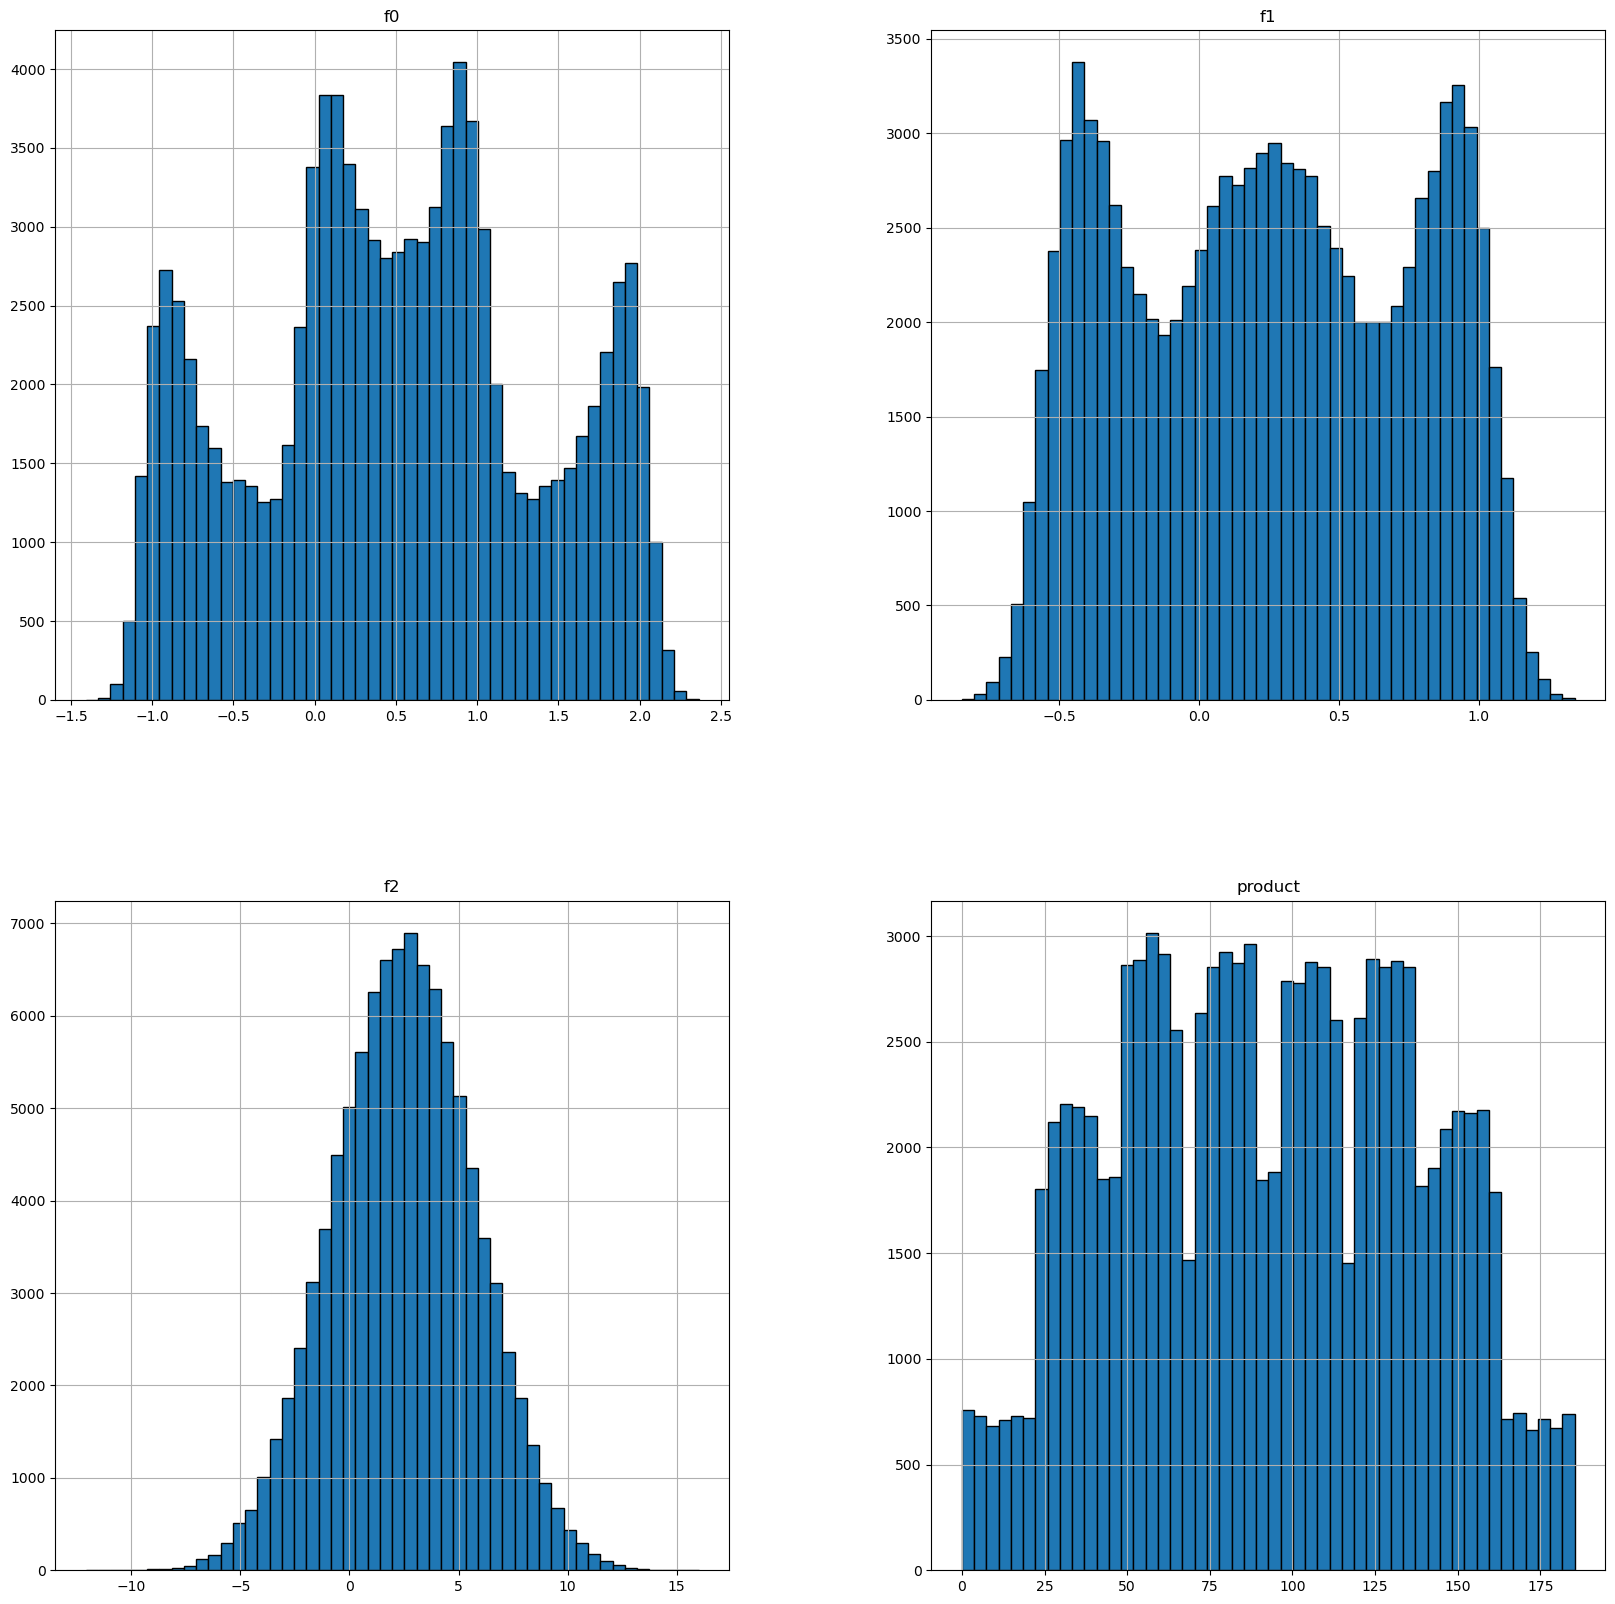

In [32]:
reg_1.hist(bins=50, figsize=(20, 20), edgecolor='black');

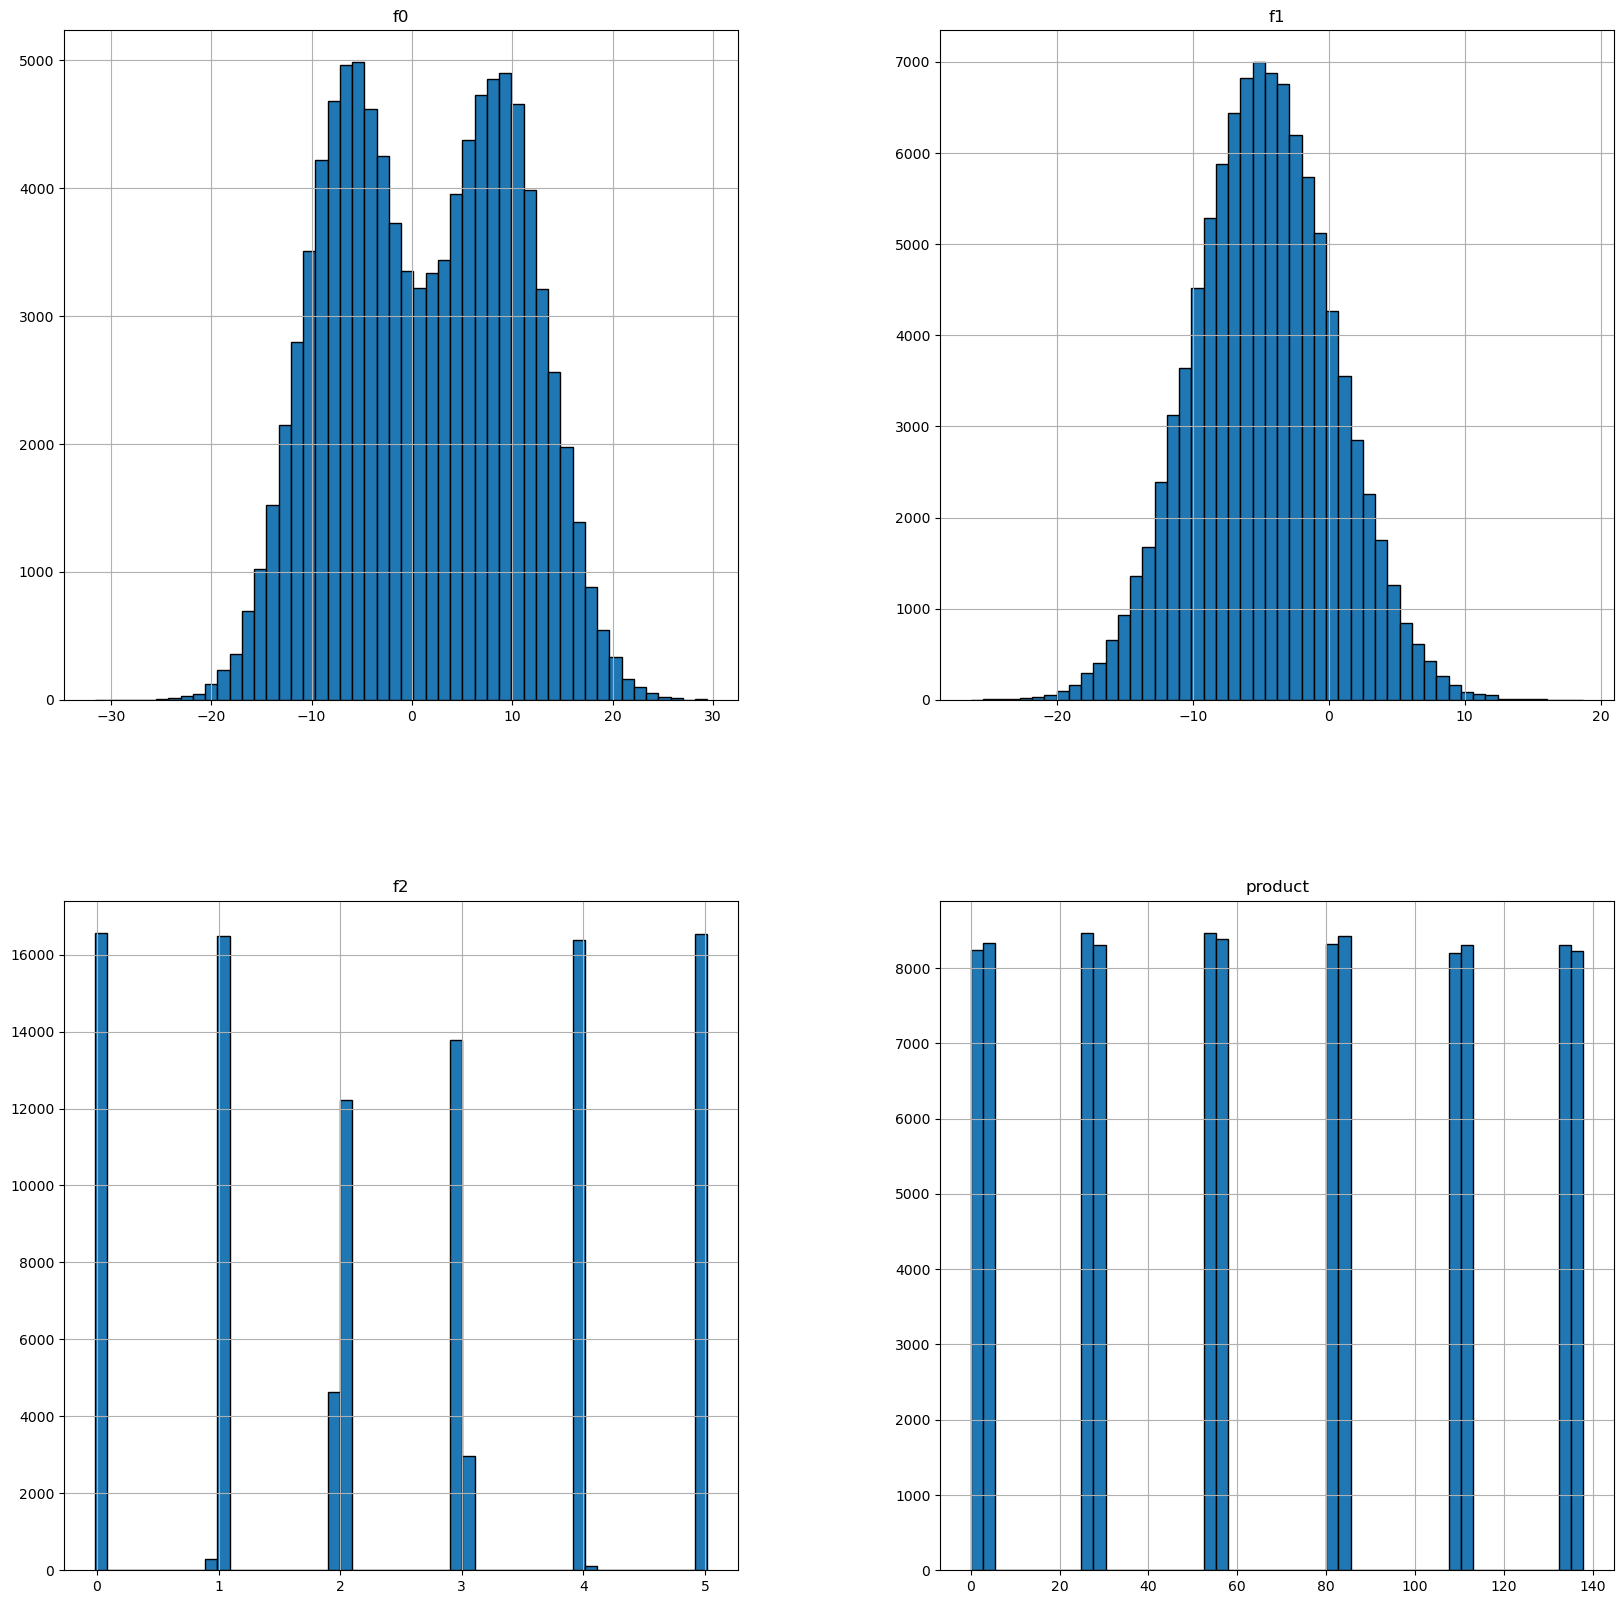

In [33]:
reg_2.hist(bins=50, figsize=(20, 20), edgecolor='black');

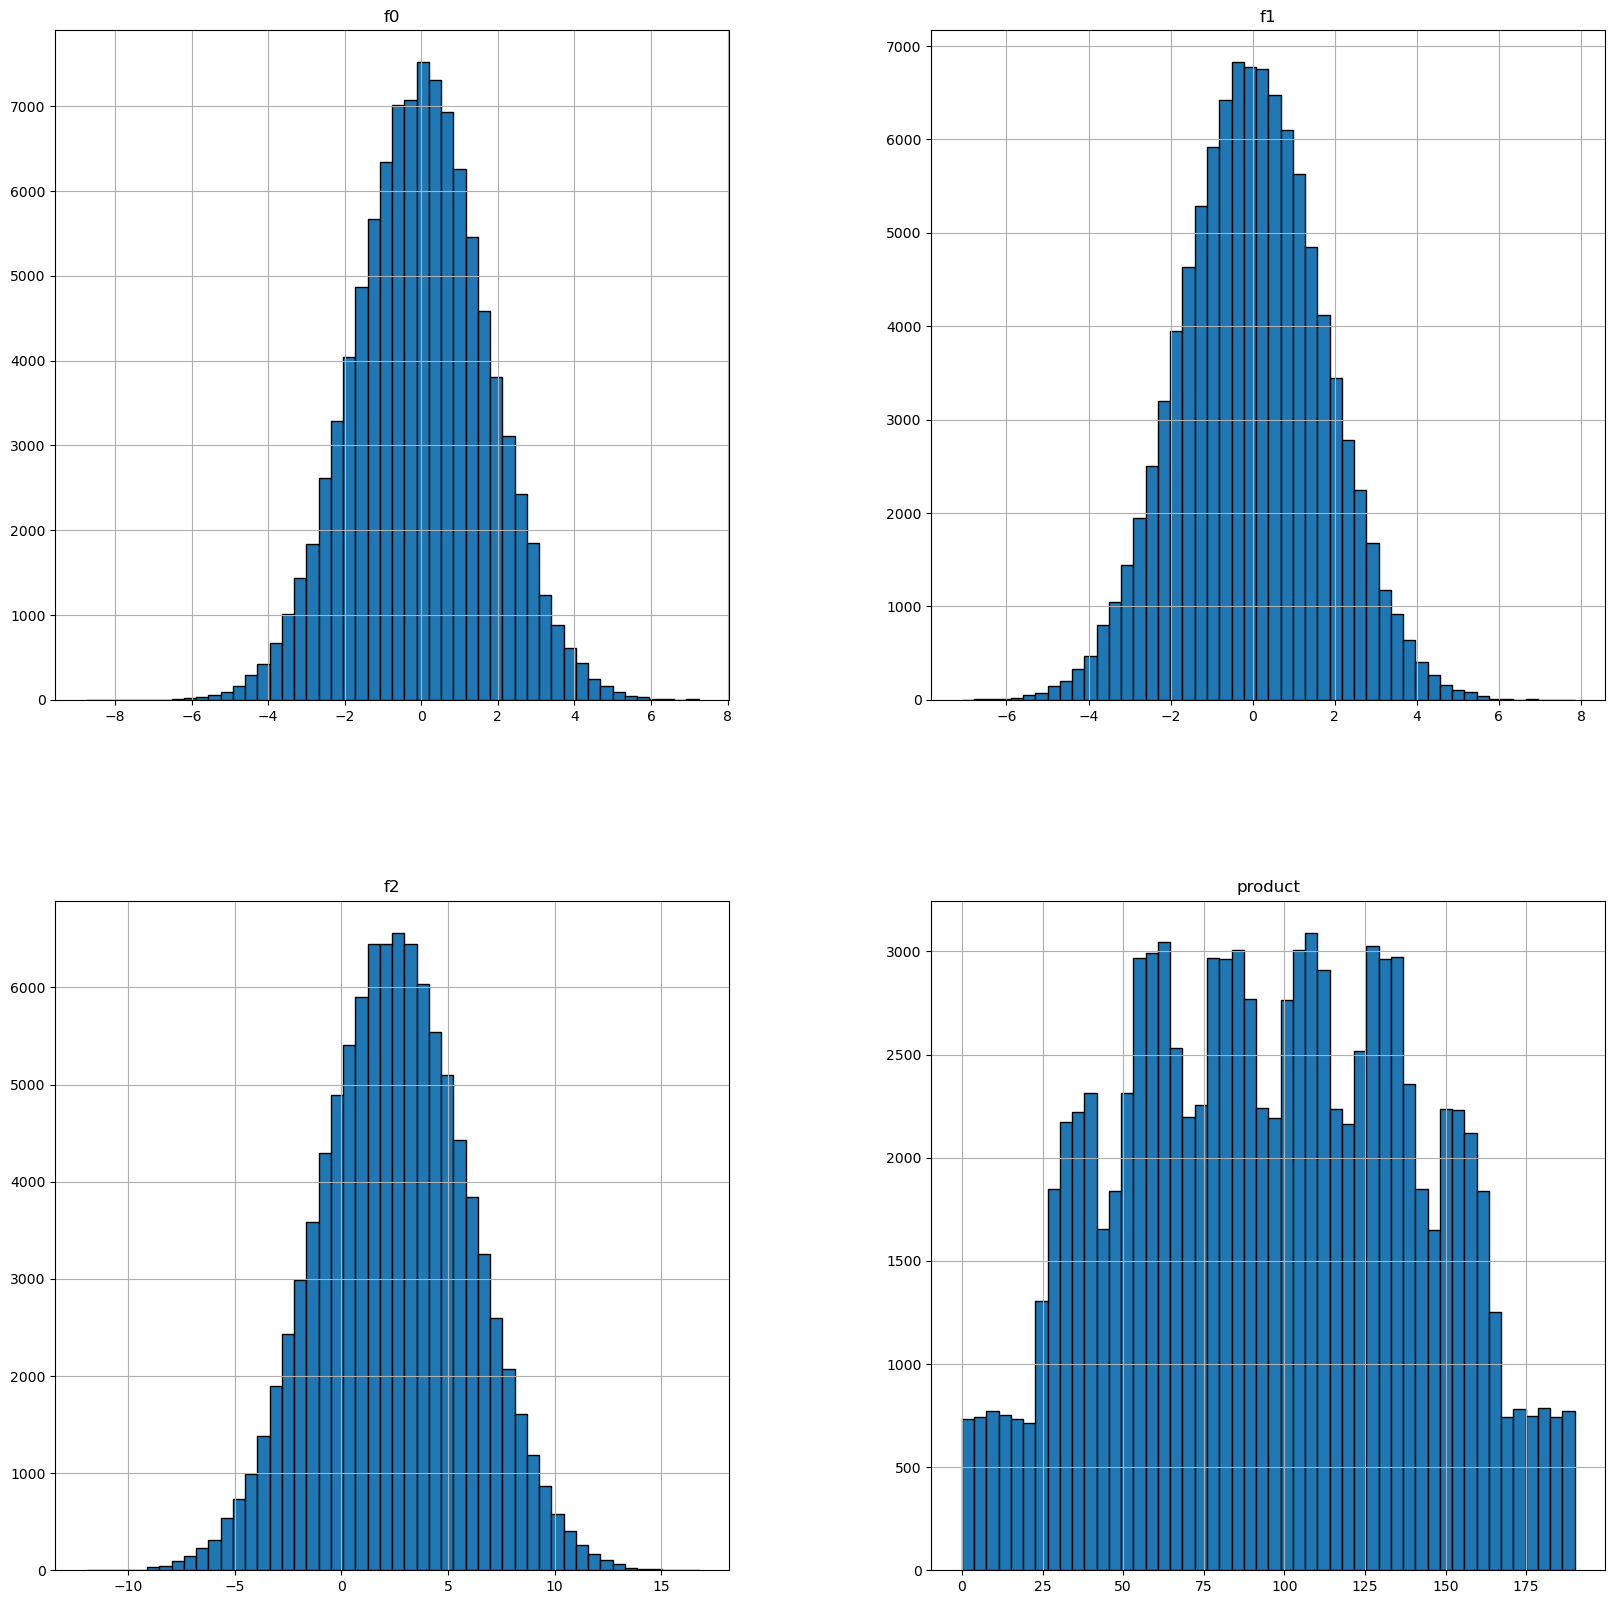

In [34]:
reg_3.hist(bins=50, figsize=(20, 20), edgecolor='black');

В первом датасете данные распределенны нормально, но со всплесками.
Во втором датасете показатели f2 и product имеют странное распределение вокруг малого количества значений.
В третьем датасете распределение нормальное.

In [35]:
df_1 = reg_1.drop('id', axis=1)
df_2 = reg_2.drop('id', axis=1)
df_3 = reg_3.drop('id', axis=1)

Идентификатор скважины не несет полезной информации, его убираем.

In [38]:
print('Корреляция Региона 1:')
print(df_1.corr())
print()
print('Корреляция Региона 2:')
print(df_2.corr())
print()
print('Корреляция Региона 3:')
print(df_3.corr())

Корреляция Региона 1:
               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000

Корреляция Региона 2:
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000

Корреляция Региона 3:
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


Во всех датасетах есть заметная корреляция между признаками f2 и product.
Во втором датасете корреляция равна почти 100%. Вероятно, она появляется из-за анамалии в распределении даннных.

## Обучение и проверка модели

In [39]:
def split_data(data, target_column):
    return data.drop(columns=[target_column], axis=1), data[target_column]

Функция для выделения целевого признака

In [40]:
features_1, target_1 = split_data(df_1,'product')

In [42]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features_1, target_1, test_size=.25, random_state=12345)

In [43]:
X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape

((75000, 3), (25000, 3), (75000,), (25000,))

## Подготовка к расчёту прибыли

## Расчёт прибыли и рисков 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован